### Prepare phenoype for subtype analysis : Emotion task

- Build a scrubbing file to be used on subtype analysis for emotion task
- Add mean run1 and run1 for FD an FD_scrubbed
- Visualize correlation between run 1 and 2 for FD and FD scrubbed
- merge clustered phenotype with scrubbing

In [1]:
# Import pandas
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
%matplotlib inline

In [3]:
# Set path
path_root = "~/Drive/HCP/"
path_scrub = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group.csv")
# Read scrubbing file
scrub_raw = pd.read_csv(path_scrub)
scrub_raw.head(20)

,,frames_scrubbed,frames_OK,FD,FD_scrubbed
0,HCP100206_sess1_wmRL,0.0,405.0,0.083342,0.083342
1,HCP100206_sess1_wmLR,0.0,405.0,0.082368,0.082368
2,HCP100206_sess1_gambRL,0.0,253.0,0.081728,0.081728
3,HCP100206_sess1_gambLR,0.0,253.0,0.098565,0.098565
4,HCP100206_sess1_motRL,0.0,284.0,0.090883,0.090883
5,HCP100206_sess1_motLR,0.0,284.0,0.090883,0.090883
6,HCP100206_sess2_langRL,0.0,316.0,0.088456,0.088456
7,HCP100206_sess2_langLR,0.0,316.0,0.099963,0.099963
8,HCP100206_sess2_socRL,0.0,274.0,0.084949,0.084949
9,HCP100206_sess2_socLR,0.0,274.0,0.096656,0.096656


In [4]:
# Select specific task
# run1
scrub_select_RL = scrub_raw[scrub_raw[' '].str.contains("emRL")]
scrub_select_RL.rename(columns={'FD_scrubbed':'FD_scrubbed_RL','FD ':'FD_RL'},inplace=True)
scrub_select_RL.loc[:,'ID'] = scrub_select_RL[' '].str.replace('_sess2_emRL ','')

# run2 
scrub_select_LR = scrub_raw[scrub_raw[' '].str.contains("emLR")]
scrub_select_LR.rename(columns={'FD_scrubbed':'FD_scrubbed_LR','FD ':'FD_LR'},inplace=True)
scrub_select_LR.loc[:,'ID'] = scrub_select_LR[' '].str.replace('_sess2_emLR ','')

display(scrub_select_RL.head())
display(scrub_select_LR.head())

/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

,,frames_scrubbed,frames_OK,FD_RL,FD_scrubbed_RL,ID
12,HCP100206_sess2_emRL,0.0,176.0,0.083053,0.083053,HCP100206
26,HCP100307_sess2_emRL,0.0,176.0,0.102121,0.102121,HCP100307
40,HCP100408_sess2_emRL,0.0,176.0,0.113475,0.113475,HCP100408
54,HCP100610_sess2_emRL,0.0,176.0,0.158172,0.158172,HCP100610
68,HCP101006_sess2_emRL,0.0,176.0,0.132186,0.132186,HCP101006


,,frames_scrubbed,frames_OK,FD_LR,FD_scrubbed_LR,ID
13,HCP100206_sess2_emLR,0.0,176.0,0.088776,0.088776,HCP100206
27,HCP100307_sess2_emLR,0.0,176.0,0.090372,0.090372,HCP100307
41,HCP100408_sess2_emLR,0.0,176.0,0.133985,0.133985,HCP100408
55,HCP100610_sess2_emLR,13.0,163.0,0.174523,0.166174,HCP100610
69,HCP101006_sess2_emLR,0.0,176.0,0.117849,0.117849,HCP101006


In [5]:
# Select interest variables
scrub_select_LR_merge = scrub_select_LR [[' ','FD_LR','FD_scrubbed_LR','ID']]
scrub_select_RL_merge = scrub_select_RL [[' ','FD_RL','FD_scrubbed_RL','ID']]
display(scrub_select_RL_merge.head())
display(scrub_select_LR_merge.head())

,,FD_RL,FD_scrubbed_RL,ID
12,HCP100206_sess2_emRL,0.083053,0.083053,HCP100206
26,HCP100307_sess2_emRL,0.102121,0.102121,HCP100307
40,HCP100408_sess2_emRL,0.113475,0.113475,HCP100408
54,HCP100610_sess2_emRL,0.158172,0.158172,HCP100610
68,HCP101006_sess2_emRL,0.132186,0.132186,HCP101006


,,FD_LR,FD_scrubbed_LR,ID
13,HCP100206_sess2_emLR,0.088776,0.088776,HCP100206
27,HCP100307_sess2_emLR,0.090372,0.090372,HCP100307
41,HCP100408_sess2_emLR,0.133985,0.133985,HCP100408
55,HCP100610_sess2_emLR,0.174523,0.166174,HCP100610
69,HCP101006_sess2_emLR,0.117849,0.117849,HCP101006


In [6]:
# Merge the raw table 
if np.shape(scrub_select_RL_merge)[0] >= np.shape(scrub_select_LR_merge)[0]:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='left')
else:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='right')



In [7]:
merged_scrub_RL_LR.head()

,_x,FD_RL,FD_scrubbed_RL,ID,_y,FD_LR,FD_scrubbed_LR
0,HCP100206_sess2_emRL,0.083053,0.083053,HCP100206,HCP100206_sess2_emLR,0.088776,0.088776
1,HCP100307_sess2_emRL,0.102121,0.102121,HCP100307,HCP100307_sess2_emLR,0.090372,0.090372
2,HCP100408_sess2_emRL,0.113475,0.113475,HCP100408,HCP100408_sess2_emLR,0.133985,0.133985
3,HCP100610_sess2_emRL,0.158172,0.158172,HCP100610,HCP100610_sess2_emLR,0.174523,0.166174
4,HCP101006_sess2_emRL,0.132186,0.132186,HCP101006,HCP101006_sess2_emLR,0.117849,0.117849


In [8]:
merged_scrub_RL_LR_subset = merged_scrub_RL_LR[['ID','FD_RL','FD_scrubbed_RL','FD_LR','FD_scrubbed_LR']]

In [9]:
merged_scrub_RL_LR_subset.head()

,ID,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR
0,HCP100206,0.083053,0.083053,0.088776,0.088776
1,HCP100307,0.102121,0.102121,0.090372,0.090372
2,HCP100408,0.113475,0.113475,0.133985,0.133985
3,HCP100610,0.158172,0.158172,0.174523,0.166174
4,HCP101006,0.132186,0.132186,0.117849,0.117849


In [10]:
# calculate the mean FD and FD scrubbed
merged_scrub_RL_LR_subset.loc[:,'FD_scrubbed_mean'] = merged_scrub_RL_LR_subset[['FD_scrubbed_RL','FD_scrubbed_LR']].mean(axis=1)
merged_scrub_RL_LR_subset.loc[:,'FD_mean'] = merged_scrub_RL_LR_subset[['FD_RL','FD_LR']].mean(axis=1)

# replace empty cell by nan
merged_scrub_RL_LR_subset.replace('',np.nan,inplace=True)

# remove the ID header for niak_read_csv
merged_scrub_RL_LR_subset.rename(columns={'ID':''},inplace=True)

# Save the file
merged_scrub_RL_LR_subset.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group_emotion.csv"), index=False)

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
# Show final table
merged_scrub_RL_LR_subset.head()

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
0,HCP100206,0.083053,0.083053,0.088776,0.088776,0.085915,0.085915
1,HCP100307,0.102121,0.102121,0.090372,0.090372,0.096246,0.096246
2,HCP100408,0.113475,0.113475,0.133985,0.133985,0.123730,0.123730
3,HCP100610,0.158172,0.158172,0.174523,0.166174,0.162173,0.166348
4,HCP101006,0.132186,0.132186,0.117849,0.117849,0.125018,0.125018


In [12]:
merged_scrub_RL_LR_subset.describe()

,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
count,834.000000,834.000000,832.000000,832.000000,834.000000,834.000000
mean,0.133015,0.125743,0.133404,0.125787,0.125739,0.133175
std,0.046736,0.035161,0.048097,0.035196,0.034145,0.045356
min,0.052363,0.052363,0.063761,0.060318,0.060650,0.060650
25%,0.102507,0.100640,0.101854,0.099381,0.101399,0.102794
50%,0.122759,0.119734,0.125412,0.120487,0.119930,0.124163
75%,0.152546,0.145315,0.152863,0.144698,0.144696,0.152679
max,0.724096,0.274987,0.662469,0.284186,0.279587,0.693282


In [13]:
# find out if variables are correlated
corr= merged_scrub_RL_LR_subset.corr()

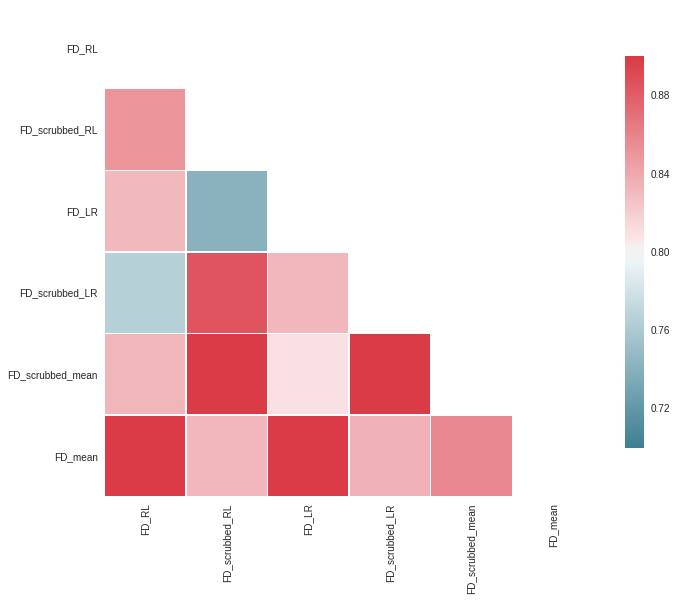

In [14]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,vmax=0.9,vmin=0.7,
            square=True,mask=mask,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

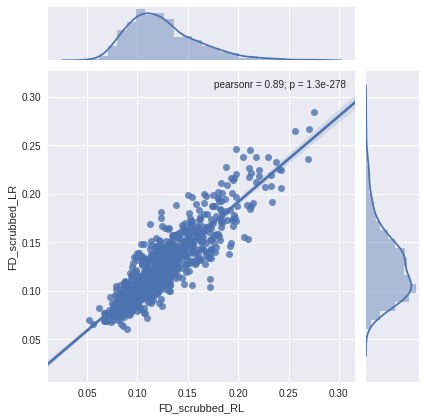

In [15]:
# FD_scrubbed correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_scrubbed_RL", y="FD_scrubbed_LR", data=merged_scrub_RL_LR_subset,kind="reg");

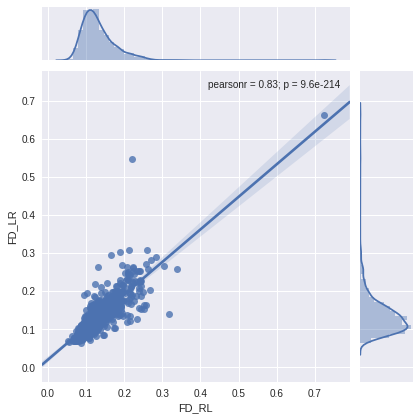

In [16]:
# FD correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_RL", y="FD_LR", data=merged_scrub_RL_LR_subset,kind="reg");

### merge clustered pheno with age gender and handedness

In [31]:
## merge clustered pheno with age gender and handedness
pheno_raw = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno.csv'))
pheno_raw = pheno_raw.rename(columns=lambda x: x.strip())
pheno_clust = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_bootstraped_pheno_nonan_norm_python.csv'))
pheno_clust = pheno_clust.rename(columns=lambda x: x.strip())

In [32]:
merged_pheno = pd.merge(pheno_raw[['Subject','Age_in_Yrs','Gender','Twin_Stat','Zygosity','Mother_ID','BMI']],
                        pheno_clust, on='Subject', how='right')
merged_pheno.loc[:,'Subject'] = 'HCP' + merged_pheno['Subject'].astype(str)
merged_pheno.head()

,Subject,Age_in_Yrs,Gender,Twin_Stat,Zygosity,Mother_ID,BMI,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,HCP100004,24,M,NotTwin,NotTwin,52259,25.49,1.187095,0.084484,0.252381,-1.531334,0.468441,-0.755941,0.397578,0.063112,-0.244554
1,HCP100206,27,M,NotTwin,NotTwin,56037,26.64,1.285200,1.430662,0.090595,-0.511867,0.708044,-0.311561,1.976455,-0.221303,0.571492
2,HCP100307,27,F,Twin,NotMZ,51488,22.96,0.523454,-0.714056,-0.663549,-0.142587,-0.559104,-0.582609,-0.704316,-0.792560,0.421945
3,HCP100408,33,M,Twin,MZ,51730,27.75,0.092377,-0.034456,1.070145,0.219718,-0.108636,0.026297,-0.590364,-0.167300,-0.049222
4,HCP100610,27,M,Twin,NotMZ,52813,36.91,-0.361653,-0.387092,0.813155,-0.198723,-0.575019,1.430869,0.201677,-0.631634,0.770983


In [33]:
# check if there is any nan value
merged_pheno.isnull().values.any()

True

In [34]:
# remove missing 
missing = np.array([merged_pheno[col].isnull().values for col in merged_pheno.columns.get_values()]).any(0)
merged_pheno_clean = merged_pheno[~missing]
merged_pheno_clean.count()

Subject       931
Age_in_Yrs    931
Gender        931
Twin_Stat     931
Zygosity      931
Mother_ID     931
BMI           931
Cluster_1     931
Cluster_2     931
Cluster_3     931
Cluster_4     931
Cluster_5     931
Cluster_6     931
Cluster_7     931
Cluster_8     931
Cluster_9     931
dtype: int64

In [35]:
# set gender to numerical
merged_pheno_clean.loc[:,'Gender']= merged_pheno_clean.Gender.replace({'M':1,'F':2})

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
merged_pheno_clean.head()

,Subject,Age_in_Yrs,Gender,Twin_Stat,Zygosity,Mother_ID,BMI,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,HCP100004,24,1,NotTwin,NotTwin,52259,25.49,1.187095,0.084484,0.252381,-1.531334,0.468441,-0.755941,0.397578,0.063112,-0.244554
1,HCP100206,27,1,NotTwin,NotTwin,56037,26.64,1.285200,1.430662,0.090595,-0.511867,0.708044,-0.311561,1.976455,-0.221303,0.571492
2,HCP100307,27,2,Twin,NotMZ,51488,22.96,0.523454,-0.714056,-0.663549,-0.142587,-0.559104,-0.582609,-0.704316,-0.792560,0.421945
3,HCP100408,33,1,Twin,MZ,51730,27.75,0.092377,-0.034456,1.070145,0.219718,-0.108636,0.026297,-0.590364,-0.167300,-0.049222
4,HCP100610,27,1,Twin,NotMZ,52813,36.91,-0.361653,-0.387092,0.813155,-0.198723,-0.575019,1.430869,0.201677,-0.631634,0.770983


In [37]:
#put Subject ID header  then merge
merged_scrub_RL_LR_subset.rename(columns={'':'Subject'},inplace=True)
merged_pheno_scrub = pd.merge(merged_scrub_RL_LR_subset,merged_pheno_clean,how='left',on='Subject')

In [38]:
merged_pheno_scrub.count()

Subject             834
FD_RL               834
FD_scrubbed_RL      834
FD_LR               832
FD_scrubbed_LR      832
FD_scrubbed_mean    834
FD_mean             834
Age_in_Yrs          807
Gender              807
Twin_Stat           807
Zygosity            807
Mother_ID           807
BMI                 807
Cluster_1           807
Cluster_2           807
Cluster_3           807
Cluster_4           807
Cluster_5           807
Cluster_6           807
Cluster_7           807
Cluster_8           807
Cluster_9           807
dtype: int64

In [39]:
# remove subject with missing data
missing_merged = np.array([merged_pheno_scrub[col].isnull().values for col in merged_pheno_scrub.columns.get_values()]).any(0)
merged_pheno_scrub_clean = merged_pheno_scrub[~missing_merged]

In [40]:
merged_pheno_scrub_clean.count()

Subject             805
FD_RL               805
FD_scrubbed_RL      805
FD_LR               805
FD_scrubbed_LR      805
FD_scrubbed_mean    805
FD_mean             805
Age_in_Yrs          805
Gender              805
Twin_Stat           805
Zygosity            805
Mother_ID           805
BMI                 805
Cluster_1           805
Cluster_2           805
Cluster_3           805
Cluster_4           805
Cluster_5           805
Cluster_6           805
Cluster_7           805
Cluster_8           805
Cluster_9           805
dtype: int64

In [41]:
merged_pheno_scrub_clean.head(10)

,Subject,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean,Age_in_Yrs,Gender,Twin_Stat,...,BMI,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,HCP100206,0.083053,0.083053,0.088776,0.088776,0.085915,0.085915,27.0,1.0,NotTwin,...,26.64,1.285200,1.430662,0.090595,-0.511867,0.708044,-0.311561,1.976455,-0.221303,0.571492
1,HCP100307,0.102121,0.102121,0.090372,0.090372,0.096246,0.096246,27.0,2.0,Twin,...,22.96,0.523454,-0.714056,-0.663549,-0.142587,-0.559104,-0.582609,-0.704316,-0.792560,0.421945
2,HCP100408,0.113475,0.113475,0.133985,0.133985,0.123730,0.123730,33.0,1.0,Twin,...,27.75,0.092377,-0.034456,1.070145,0.219718,-0.108636,0.026297,-0.590364,-0.167300,-0.049222
3,HCP100610,0.158172,0.158172,0.174523,0.166174,0.162173,0.166348,27.0,1.0,Twin,...,36.91,-0.361653,-0.387092,0.813155,-0.198723,-0.575019,1.430869,0.201677,-0.631634,0.770983
4,HCP101006,0.132186,0.132186,0.117849,0.117849,0.125018,0.125018,35.0,2.0,Twin,...,30.27,0.037814,-0.884476,0.444130,-0.310122,-0.382892,-0.364271,-0.755113,0.459547,-0.740855
5,HCP101107,0.234012,0.079017,0.126360,0.104782,0.091899,0.180186,22.0,1.0,NotTwin,...,21.13,0.202495,0.226738,-0.559673,0.350452,1.342476,0.021861,-0.278376,0.342744,-0.562346
6,HCP101309,0.079122,0.079122,0.089320,0.080052,0.079587,0.084221,29.0,1.0,NotTwin,...,22.20,-1.055772,-0.784829,-0.488804,0.396601,-0.311712,0.270656,-0.669878,-0.148125,-0.599108
7,HCP101410,0.147346,0.147346,0.169971,0.169971,0.158659,0.158659,29.0,1.0,Twin,...,24.27,-0.213366,0.038804,0.648966,0.388945,-0.441041,-0.175267,-0.377717,-0.478595,-0.649063
8,HCP101915,0.079037,0.079037,0.101493,0.101493,0.090265,0.090265,35.0,2.0,NotTwin,...,20.42,-0.838038,-0.376029,-0.917120,1.173695,-0.365245,1.127413,-0.649360,-0.357989,-0.309757
9,HCP102008,0.143513,0.143513,0.152666,0.152666,0.148090,0.148090,24.0,1.0,NotTwin,...,31.42,-0.101973,0.951127,0.735433,0.654455,0.493727,0.160656,0.058103,-0.159212,0.394972


In [42]:
##save to csv
merged_pheno_scrub_clean.rename(columns={'Subject':''},inplace=True)
# for solar
merged_pheno_scrub_clean.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_emotion_raw.csv"), index=False)
# for subtype
merged_pheno_scrub_clean.drop(['Twin_Stat', 'Zygosity'], axis=1).to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_emotion.csv"), index=False)

/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [43]:
merged_pheno_scrub_clean

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean,Age_in_Yrs,Gender,Twin_Stat,...,BMI,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,HCP100206,0.083053,0.083053,0.088776,0.088776,0.085915,0.085915,27.0,1.0,NotTwin,...,26.64,1.285200,1.430662,0.090595,-0.511867,0.708044,-0.311561,1.976455,-0.221303,0.571492
1,HCP100307,0.102121,0.102121,0.090372,0.090372,0.096246,0.096246,27.0,2.0,Twin,...,22.96,0.523454,-0.714056,-0.663549,-0.142587,-0.559104,-0.582609,-0.704316,-0.792560,0.421945
2,HCP100408,0.113475,0.113475,0.133985,0.133985,0.123730,0.123730,33.0,1.0,Twin,...,27.75,0.092377,-0.034456,1.070145,0.219718,-0.108636,0.026297,-0.590364,-0.167300,-0.049222
3,HCP100610,0.158172,0.158172,0.174523,0.166174,0.162173,0.166348,27.0,1.0,Twin,...,36.91,-0.361653,-0.387092,0.813155,-0.198723,-0.575019,1.430869,0.201677,-0.631634,0.770983
4,HCP101006,0.132186,0.132186,0.117849,0.117849,0.125018,0.125018,35.0,2.0,Twin,...,30.27,0.037814,-0.884476,0.444130,-0.310122,-0.382892,-0.364271,-0.755113,0.459547,-0.740855
5,HCP101107,0.234012,0.079017,0.126360,0.104782,0.091899,0.180186,22.0,1.0,NotTwin,...,21.13,0.202495,0.226738,-0.559673,0.350452,1.342476,0.021861,-0.278376,0.342744,-0.562346
6,HCP101309,0.079122,0.079122,0.089320,0.080052,0.079587,0.084221,29.0,1.0,NotTwin,...,22.20,-1.055772,-0.784829,-0.488804,0.396601,-0.311712,0.270656,-0.669878,-0.148125,-0.599108
7,HCP101410,0.147346,0.147346,0.169971,0.169971,0.158659,0.158659,29.0,1.0,Twin,...,24.27,-0.213366,0.038804,0.648966,0.388945,-0.441041,-0.175267,-0.377717,-0.478595,-0.649063
8,HCP101915,0.079037,0.079037,0.101493,0.101493,0.090265,0.090265,35.0,2.0,NotTwin,...,20.42,-0.838038,-0.376029,-0.917120,1.173695,-0.365245,1.127413,-0.649360,-0.357989,-0.309757
9,HCP102008,0.143513,0.143513,0.152666,0.152666,0.148090,0.148090,24.0,1.0,NotTwin,...,31.42,-0.101973,0.951127,0.735433,0.654455,0.493727,0.160656,0.058103,-0.159212,0.394972
